In [174]:
import pandas as analytics
import numpy as maths
from locations import train_location, vocabulary_location
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [175]:
df_vocabulary = analytics.read_csv(vocabulary_location)

In [176]:
df_vocabulary = df_vocabulary.rename(columns = {df_vocabulary.columns[0]:'index'})
tokens = list(df_vocabulary['token'])
df_vocabulary

index         token
0          0       retreat
1          1         repay
2          2    definitive
3          3        nikkei
4          4        caused
...      ...           ...
10004  10004      bookings
10005  10005  minimum-wage
10006  10006      slipping
10007  10007        person
10008  10008    integrated

[10009 rows x 2 columns]

In [177]:
df_train = analytics.read_csv(train_location,header= None)

In [178]:
def convert_sentence_to_vector(sentence):
    ids = []
    for word in sentence :
        if word in tokens:
            ids.append(tokens.index(word))
    return ids

In [179]:
def convert_vector_to_sentence(vector):
    sentence = ""
    for word_id in vector :
        word = df_vocabulary.iloc[word_id]['token']
        sentence += word + " "
    sentence.strip()
    return sentence

count    42068.000000
mean       120.270752
std         58.694396
min          4.000000
25%         77.000000
50%        115.000000
75%        156.000000
max        520.000000
Name: len, dtype: float64


<AxesSubplot: ylabel='Frequency'>

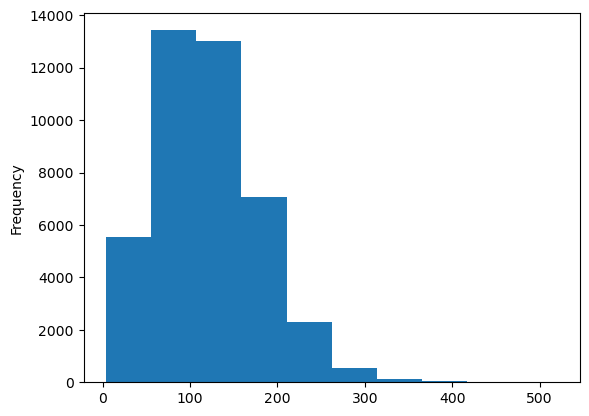

In [207]:
df_train['len'] = df_train[0].apply(lambda x:len(x))
print(df_train['len'].describe())
df_train['len'].plot(kind = 'hist')

In [180]:
dataset = []
for i in range(len(df_train[:100])):
    sentence = df_train.iloc[i][0].strip().split()
    dataset = dataset + convert_sentence_to_vector(sentence)

In [185]:
dataset = tf.data.Dataset.from_tensor_slices(dataset)

In [254]:
seq_length = 320
sequences = dataset.batch(seq_length+1, drop_remainder=True)
for seq in sequences.take(1):
    print(convert_vector_to_sentence(seq.numpy()))

aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter pierre N years old will join the board as a nonexecutive director nov. N mr. is chairman of n.v. the dutch publishing group rudolph N years old and former chairman of consolidated gold fields plc was named a nonexecutive director of this british industrial conglomerate a form of asbestos once used to make kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than N years ago researchers reported the asbestos fiber is unusually once it enters the with even brief exposures to it causing symptoms that show up decades later researchers said inc. the unit of new york-based corp. that makes kent cigarettes stopped using in its cigarette filters in N although preliminary findings were reported more than a year ago the latest results appear in today 's new england

2024-04-12 14:55:19.562901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [255]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<_PrefetchDataset element_spec=TensorSpec(shape=(64,), dtype=tf.int32, name=None)>

In [257]:
# Length of the vocabulary in StringLookup Layer
vocab_size = len(df_vocabulary)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024
